Table of Contents <br>
[1. Make balanced data & Run model](#section1)<br>
[2. Imbalanced Data](#section2)<br>
[2a. Make imbalanced data: X_imb, y_imb](#section2a)<br>
[2b. Baseline model: y_imb_predict](#section2b)<br>
[2c. Undersample: Make data (X_us, y_us) & model](#section2c)<br>
[2d. Probability](#section2d)<br>
[2e. Adjustment](#section2e)<br>
[2f. Comparison](#section2f)<br>
[2g. Conclusion](#section2g)<br>
[3. Simulation](#section3)<br>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 10, 6
np.random.seed(7)

<a id='section1'></a>

## 1 Make balanced data & Run model

### Sample data

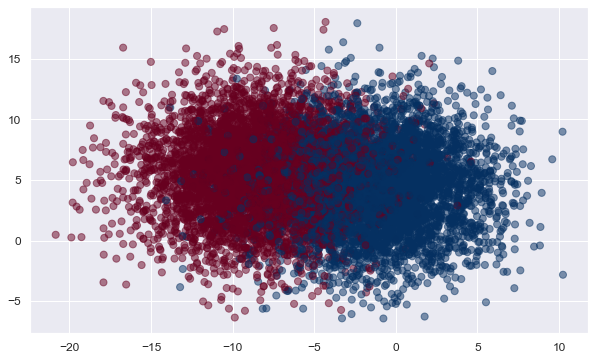

In [4]:
X, y = make_blobs(10000, 2, centers=2, random_state=7, cluster_std=3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu', alpha=0.5);

### Model

In [5]:
clf = RandomForestClassifier(n_estimators=100, max_depth=7)
clf.fit(X,y)

RandomForestClassifier(max_depth=7)

In [6]:
y_predict = clf.predict(X)

In [7]:
print( accuracy_score(y, y_predict) )
print( f1_score(y, y_predict) )
print( recall_score(y, y_predict))
print( precision_score(y, y_predict))

0.8686
0.8680457923277767
0.8644
0.8717224687373941


<a id='section2'></a>

## 2 Imbalanced Data

<a id='section2a'></a>

### A.  Make imbalanced data: X_imb, y_imb

In [8]:
idx0 = np.where(y==0)[0]
idx1 = np.where(y==1)[0]

In [9]:
imbalance_size = int(0.1*len(idx1))
idx1_imb = np.random.choice(idx1, size=imbalance_size)
idx_imb = np.concatenate( (idx0, idx1_imb))
idx_imb = np.sort(idx_imb)

In [10]:
X_imb = X[idx_imb]
y_imb = y[idx_imb]

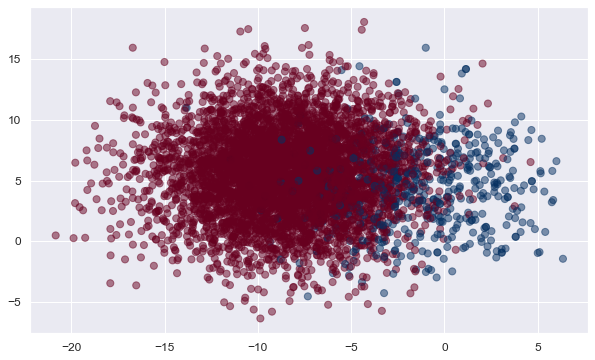

In [11]:
plt.scatter(X_imb[:, 0], X_imb[:, 1], c=y_imb, s=50, cmap='RdBu', alpha=0.5);

<a id='section2b'></a>

### B. Baseline model: y_imb_predict

In [12]:
clf_imb = RandomForestClassifier(n_estimators=100, max_depth=7)
clf_imb.fit(X_imb,y_imb)

RandomForestClassifier(max_depth=7)

In [13]:
y_imb_predict = clf_imb.predict(X_imb)

In [14]:
print( accuracy_score(y_imb, y_imb_predict) )
print( f1_score(y_imb, y_imb_predict) )
print( recall_score(y_imb, y_imb_predict))
print( precision_score(y_imb, y_imb_predict))

0.9530909090909091
0.6861313868613139
0.564
0.8757763975155279


<a id='section2c'></a>

### C. Undersample: Make data (X_us, y_us) & model

In [15]:
idx0 = np.where(y_imb==0)[0]
idx1 = np.where(y_imb==1)[0]

In [16]:
ratio = 2 # 'ratio' zeros for every one
us_size = int(ratio*len(idx1))
idx0_us = np.random.choice(idx0, size=us_size)
idx_us = np.concatenate( (idx0_us, idx1))
idx_us = np.sort(idx_us)

In [17]:
X_us = X_imb[idx_us]
y_us = y_imb[idx_us]

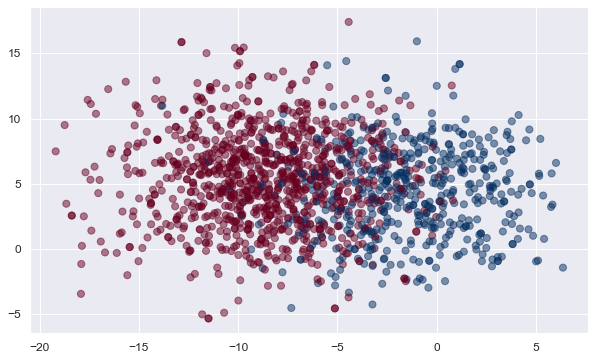

In [18]:
plt.scatter(X_us[:, 0], X_us[:, 1], c=y_us, s=50, cmap='RdBu', alpha=0.5);

In [19]:
clf_us = RandomForestClassifier(n_estimators=100, max_depth=7)
clf_us.fit(X_us, y_us)

RandomForestClassifier(max_depth=7)

In [20]:
y_us_predict = clf_us.predict(X_us)
y_imb_predict_us = clf_us.predict(X_imb)

Performance on undersample (y_us)

In [21]:
print( accuracy_score(y_us, y_us_predict) )
print( f1_score(y_us, y_us_predict) )
print( recall_score(y_us, y_us_predict))
print( precision_score(y_us, y_us_predict))

0.912
0.8647540983606558
0.844
0.8865546218487395


Performance on imbalanced (y_imb)

In [22]:
print( accuracy_score(y_imb, y_imb_predict_us) )
print( f1_score(y_imb, y_imb_predict_us) )
print( recall_score(y_imb, y_imb_predict_us))
print( precision_score(y_imb, y_imb_predict_us))

0.9078181818181819
0.6247224278312361
0.844
0.49588719153936545


Comment on recall: improves in downsample situation because the predominance of negative class on the side of the positive class hyperplane is reduced

<a id='section2d'></a>

### D. Probability

In [23]:
X1 = np.linspace(-20, 5, num=100)
X2 = np.linspace(-5, 15, num=100)
x1, x2 = np.meshgrid(X1, X2)

In [24]:
X_contour = np.vstack([x1.ravel(), x2.ravel()]).transpose()

In [25]:
Z = clf_imb.predict_proba(X_contour)
Z_us = clf_us.predict_proba(X_contour)

In [26]:
z = np.reshape( Z[:,0], x1.shape )
z_us = np.reshape( Z_us[:,0], x1.shape )

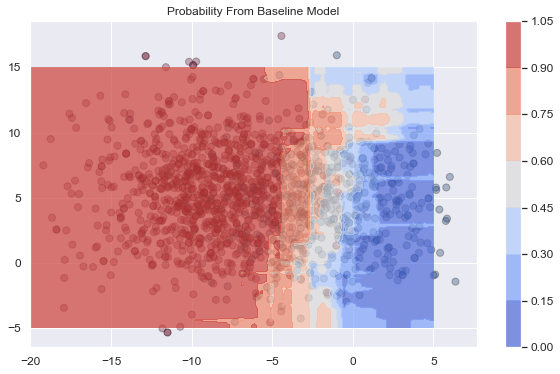

In [30]:
plt.scatter(X_us[:, 0], X_us[:, 1], c=y_us, s=50, cmap='RdBu', alpha=0.3, edgecolors='k');
plt.contourf(x1, x2, z, cmap='coolwarm', alpha=0.7,  )
plt.colorbar()
plt.title('Probability From Baseline Model');

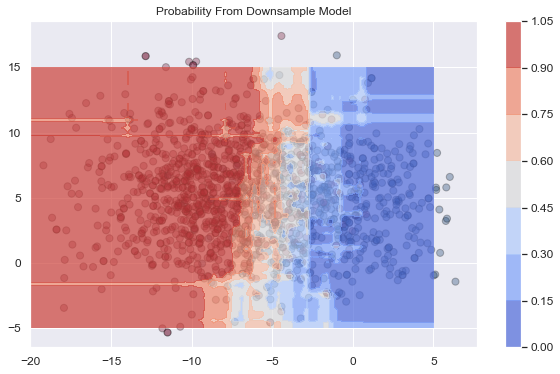

In [31]:
plt.scatter(X_us[:, 0], X_us[:, 1], c=y_us, s=50, cmap='RdBu', alpha=0.3, edgecolors='k');
plt.contourf(x1, x2, z_us, cmap='coolwarm', alpha=0.7)
plt.colorbar()
plt.title('Probability From Downsample Model');

<a id='section2e'></a>

### E. Probability Adjustment

$s$: sample included or not <br>
$Z$: event occurs


Two abbreviations:<br>
$P(Z=1)$: $p$ <br>
$P(Z=1|s=1)$: $p_s$ <br>

Defining $P(s=1)$:<br>
$P(s=1) = P(s=1|Z=1)P(Z=1) + P(s=1|Z=0)P(Z=0) = p + P(s=1|Z=0)(1-p)$ <br> 
$\beta=P(s=1|Z=0)$<br>
$P(s=1)=p+\beta(1-p)$<br>

Reducing relationship:<br>
$P(Z=1|s=1)P(s=1) = P(s=1|Z=1)P(Z=1)$ <br>
$P(s=1|Z=1) = 1 $ minority class is always included <br>
$P(Z=1|s=1)P(s=1) = P(Z=1)$ <br>
$p_s (p+\beta(1-p)) = p$



$p=\frac{\beta p_s}{\beta p_s - p_s +1}$

In [49]:
num = len(y_us)-sum(y_us) #majority after downsample
denom = len(y_imb) - sum(y_imb) # majority original
beta = num/denom  
print(beta)

0.2


In [40]:
num = beta*Z_us
denom = num - Z_us + 1.0
Z_us_adj = num/denom
z_us_adj = np.reshape( Z_us_adj[:,0], x1.shape )

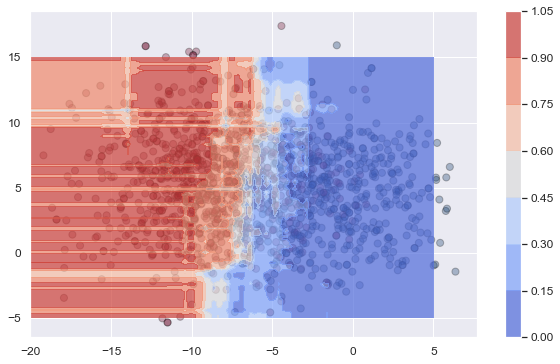

In [41]:
plt.scatter(X_us[:, 0], X_us[:, 1], c=y_us, s=50, cmap='RdBu', alpha=0.3, edgecolors='k');
plt.contourf(x1, x2, z_us_adj, cmap='coolwarm', alpha=0.7)
plt.colorbar()

In [42]:
def adj_prob(p_s, beta):
    num = beta*p_s
    denom = num - p_s + 1.0
    return num/denom

In [43]:
y_us_proba = clf_us.predict_proba(X_us)
y_imb_proba_us = clf_us.predict_proba(X_imb)

beta = len(y_us)/len(y_imb)
y_us_proba_adj = [adj_prob(p_s, beta) for p_s in y_us_proba[:,1]]
y_imb_proba_us_adj = [adj_prob(p_s, beta) for p_s in y_imb_proba_us[:,1]]

In [44]:
y_us_proba_adj_predict = [1 if y>=0.5 else 0 for y in y_us_proba_adj]
y_imb_proba_us_adj_predict = [1 if y>=0.5 else 0 for y in y_imb_proba_us_adj]

<a id='section2f'></a>

Text(0.7, 0.3, 'overestimating the prob\n of positive class wo adj')

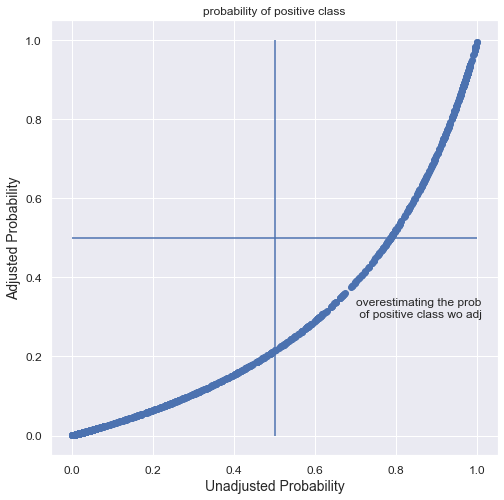

In [45]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(list(y_us_proba[:,1]), y_us_proba_adj)
ax.set_xlabel('Unadjusted Probability')
ax.set_ylabel('Adjusted Probability')
ax.hlines(0.5,0,1)
ax.vlines(0.5,0,1)
ax.set_title('probability of positive class')
ax.annotate("overestimating the prob\n of positive class wo adj", (0.7,0.3))

### F. Comparison

Sets of comparison (let 'us'=='undersample'):
* Baseline model trained on full, performance on full (y_imb)
* US model trained on us, performance on us & full.
* US model trained on us & probability adjusted, performance on us & full.

Note that full is y_imb & undersampled set is u_us

> Baseline model trained on full, performance on full (y_imb)

In [164]:
print( accuracy_score(y_imb, y_imb_predict) )
print( f1_score(y_imb, y_imb_predict) )
print( recall_score(y_imb, y_imb_predict))
print( precision_score(y_imb, y_imb_predict))

0.9530909090909091
0.6861313868613139
0.564
0.8757763975155279


> US model trained on us, performance on us & full.

In [165]:
print( accuracy_score(y_imb, y_imb_predict_us) )
print( f1_score(y_imb, y_imb_predict_us) )
print( recall_score(y_imb, y_imb_predict_us))
print( precision_score(y_imb, y_imb_predict_us))

0.9078181818181819
0.6247224278312361
0.844
0.49588719153936545


In [166]:
print( accuracy_score(y_us, y_us_predict) )
print( f1_score(y_us, y_us_predict) )
print( recall_score(y_us, y_us_predict))
print( precision_score(y_us, y_us_predict))

0.912
0.8647540983606558
0.844
0.8865546218487395


> US model trained on us & probability adjusted, performance on us & full.

In [168]:
print( accuracy_score(y_imb, y_imb_proba_us_adj_predict) )
print( f1_score(y_imb, y_imb_proba_us_adj_predict) )
print( recall_score(y_imb, y_imb_proba_us_adj_predict))
print( precision_score(y_imb, y_imb_proba_us_adj_predict))

0.9458181818181818
0.6739606126914661
0.616
0.7439613526570048


In [169]:
print( accuracy_score(y_us, y_us_proba_adj_predict) )
print( f1_score(y_us, y_us_proba_adj_predict) )
print( recall_score(y_us, y_us_proba_adj_predict))
print( precision_score(y_us, y_us_proba_adj_predict))

0.872
0.7623762376237623
0.616
1.0


<a id='section2g'></a>

### G. Conclusion

Baseline model has F1 of 69% with poor recall (56%) because the hyperplane is pushed to the right.<br>
Undersample model has a poor F1 of 62% driven by precision.  Recall does very well (84%) because the hyperplane is essentially pushed to the right.  The probability plots show more nuanced hyperplane.<br>
After making probability adjustment and then decisioning, F1 climbs to 67% (short of the baseline model), but an increase in recall to 61%.<br>

What did we gain?  We are better able to identify pockets of the minority class at the cost of overstating probability.  The probability plots show that undersamples allow more intricate hyperplanes to be generated.  In higher dimensions, this benefit is increased.  The adjustment shows the adjusting the probability clearly improves model performance.  However, the probability of a positive class is overestimated and require an adjustment.

## 5. Simulation

The simulation shows the systematic overestimation and the adjustment to bring it back in line.

In [150]:
import itertools

In [148]:
def calculate_probabilities(N, imbalance, undersample_ratio):
    target = np.random.choice([0,1], size=N, p=[imbalance, 1-imbalance])
    predicted = np.random.choice([0,1], size=N, p=[0.5, 0.5])
    
    target_undersample = np.array( [1]*sum(target) + [0]*(undersample_ratio*sum(target))) #positive + ratio*negs
    np.random.shuffle(target_undersample)
    predicted_undersample = np.random.choice([0,1], size=len(target_undersample), p=[0.5, 0.5])
    
    leaf0 = target[~predicted.astype('bool')]
    leaf1 = target[predicted.astype('bool')]
    p1 = sum(leaf1) / len(leaf1)
    p0 = 1-p1
    
    leaf1_us = target_undersample[~predicted_undersample.astype('bool')]
    p1_us = sum(leaf1_us) / len(leaf1_us)
    
    beta = (sum(target) * undersample_ratio) / (len(target) - sum(target)) # majority undersample
    
    p1_us_adj = (beta * p1_us) / (1-p1_us+beta*p1_us)
    
    return beta, p1, p1_us, p1_us_adj

In [156]:
N = 100000
imbalances = [0.5, .9, 0.95, 0.99, 0.995]
undersample_ratios = [1,2,5,10]

In [157]:
lst_out = []
for imbalance, undersample_ratio in itertools.product(imbalances, undersample_ratios):
    beta, p1, p1_us, p1_us_adj = calculate_probabilities(N, imbalance, undersample_ratio)
    lst_out.append([imbalance, undersample_ratio, beta, p1, p1_us, p1_us_adj])

In [158]:
df = pd.DataFrame(data=lst_out, columns=['imbalance', 'ratio', 'beta', 'p1', 'p1_us', 'p1_us_adj'])

In [159]:
df.head()

,imbalance,ratio,beta,p1,p1_us,p1_us_adj
0,0.5,1,0.992627,0.495755,0.501225,0.499375
1,0.5,2,2.027711,0.504628,0.333413,0.503530
2,0.5,5,5.019036,0.499430,0.166788,0.501168
3,0.5,10,10.063400,0.502298,0.090921,0.501617
4,0.9,1,0.111222,0.102144,0.497522,0.099201
